# 온라인 쇼핑몰 매출관계 분석

- 국가통계
- 온라인 쇼핑몰 판매매체별 / 상품군별거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어 미리 합침)
- 행렬을 전환
- 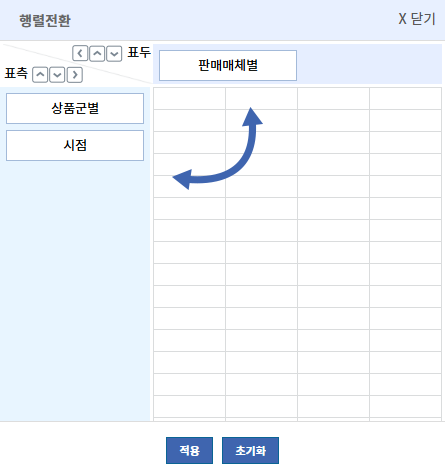
- 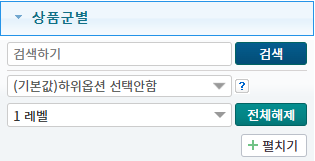
- 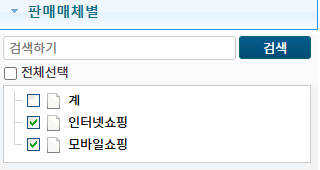
- 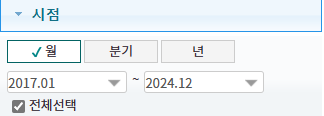

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2coding
d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
matplotlib.rcParams['font.family']='D2Coding'

In [3]:
file_path='./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250227153229.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.columns = ['category','date','internet','mobile']
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [4]:
print('수정전')
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print('수정후')
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [5]:
ori['date'] = pd.to_datetime(ori['date'], format='%Y.%m')
ori.tail().dtypes

category            object
date        datetime64[ns]
internet             int64
mobile               int64
dtype: object

In [6]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '컴퓨터 및 주변기기']
# ex1_data = ex1_data[ex1_data['category'].isin(['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스'])]
obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
630,가방,2021-07-01,52386,138249
508,신발,2019-05-01,84205,133233
1925,음식서비스,2017-06-01,25541,170090
57,컴퓨터 및 주변기기,2021-10-01,389970,339560
466,의복,2023-11-01,636149,1763483


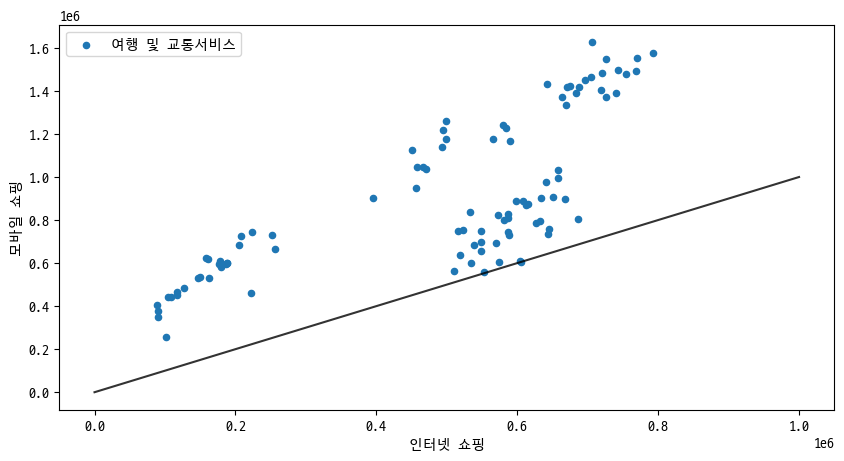

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

category_data = ex1_data[ex1_data['category'] == obj[7]]
x_data = category_data['internet']
y_data = category_data['mobile']

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')

# s=20은 산점도의 점 크기를 설정하고, label은 범례에 해당 카테고리의 이름을 추가
ax.scatter(x_data, y_data, s=20, label=obj[7])

# 범례
ax.legend(loc='best')

# (0, 0)부터 (1000000, 1000000)까지 대각선 직선을 그림. 'k-'는 검은색 실선, alpha=0.8은 투명도를 설정
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.8)
plt.show()
# print(category_data,x_data,y_data)

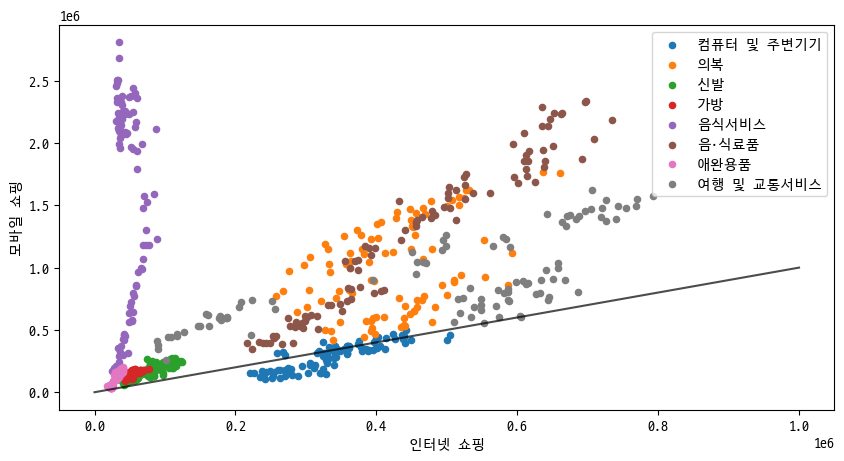

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label=cate)

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')
ax.legend(loc='best')
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.7)
plt.show()

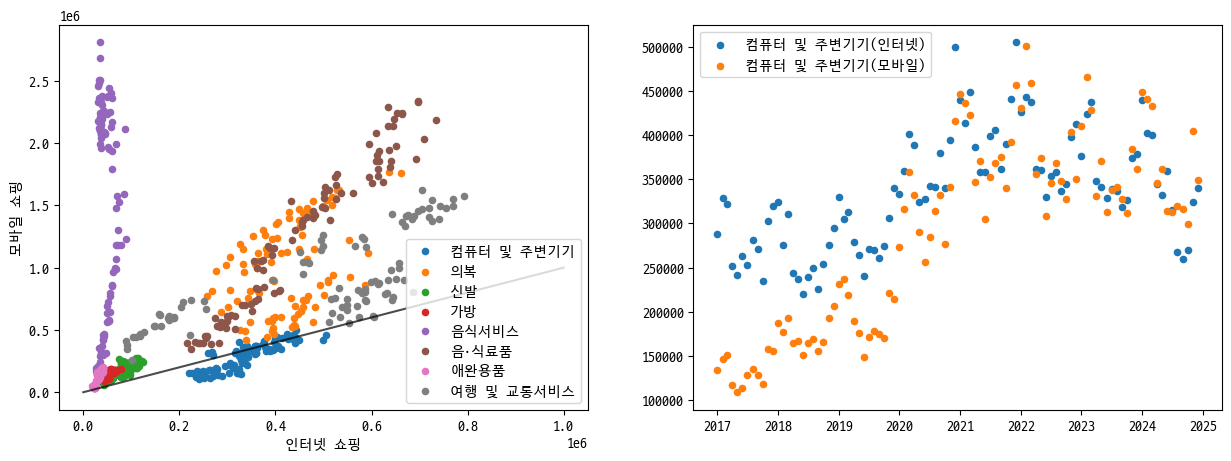

In [9]:
fig , ax = plt.subplots(1,2,figsize=(15,5))

category = obj # ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax[0].scatter( x_data , y_data, s = 20, label = cate )

ax[0].set_xlabel("인터넷 쇼핑")
ax[0].set_ylabel("모바일 쇼핑")
ax[0].legend(loc="best")
ax[0].plot([0,1000000],[0,1000000],'k-',alpha=0.7)


tdata = category_data['date']
second = ex1_data[ex1_data['category'] ==obj[0]]
idata =second['internet']
mdata =second['mobile']

ax[1].scatter( tdata , idata, s = 20, label = obj[0]+'(인터넷)')
ax[1].scatter( tdata , mdata, s = 20, label = obj[0]+'(모바일)')
ax[1].legend()

plt.show()

온라인 쇼핑 이용 현황 분석 보고서

1. 개요
모바일 및 인터넷을 통한 쇼핑 이용 현황 데이터를 분석하여 소비자들의 구매 패턴과 트렌드를 파악하는 것을 목표로 한다.

2. 분석
- 인터넷 쇼핑이 강한 품목
컴퓨터 및 주변기기(389,970건): 비교 검색이 중요한 제품은 인터넷 쇼핑이 상대적으로 많음.
신발, 가방 등도 제품 스펙 확인 후 구매하는 경향이 있음.

- 모바일 쇼핑이 강한 품목:
의복(1,763,483건), 음식 서비스(170,090건)는 모바일 쇼핑 비율이 훨씬 높음.
충동 구매가 많고, 간편 결제 시스템 또는 어플리케이션이 활성화된 품목일 가능성이 높음.

3. 결론: 카테고리별 맞춤형 마케팅 전략 필요
<!-- - 모바일 중심 마케팅 강화:
의복, 음식 서비스, 가방 등의 제품은 모바일 앱 기반의 프로모션을 적극 활용할 필요가 있음.
인플루언서 마케팅, 라이브 커머스 등 모바일 친화적인 광고 전략이 효과적일 것으로 예상됨.
- 인터넷 쇼핑 최적화:
컴퓨터 및 주변기기와 같은 제품은 상세한 제품 설명, 리뷰 제공 등을 강화하여 신뢰도를 높이는 것이 중요함.
가격 비교 기능, 맞춤형 추천 시스템을 통해 소비자의 구매 결정을 돕는 전략이 필요함. -->